In [13]:
from matplotlib import style
style.use('fivethirtyeight')

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

#Importing tools for SQLAlchemy to query the database
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [10]:
#To check to make sure teh automap worked correctly, use the keys method
Base.classes.keys()

['measurement', 'station']

In [11]:
#To reference a specific class, we can say Base.classes.station
#Create new variables for the difference classes to make it more efficient to reference later on
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
#Create a session link to the database
session = Session(engine)

In [15]:
#To start analyzing weather data, we start on a specific date: August 23, 2017
prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)
#timedelta helps us calculate back, and we want one year previous, so we set days =365

In [20]:
#Retrieve precipiation scores
results = [] #This variable will store all the results, we make it start as an empty list and add data into it as we go
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)
#Filter only the dates we want to see, .all() extracts all results from the query and puts them in a list

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [22]:
#To save query for future reference, store it in a pandas df
results_df = pd.DataFrame(results, columns = ['date', 'precipitation'])
print(results_df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [25]:
#We can manipulate how the df looks using set index
results_df.set_index(results_df['date'], inplace=True)
print(results_df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [26]:
#Since we have two date columns, we can print the df without the index column
#Not sure why we need to first convert df to strings- convert to console friendly tabular output**
print(results_df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [28]:
#The dates are not in chronilogical order above, so we need to sort the index (which is now the date) 
results_df = results_df.sort_index()
print(results_df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

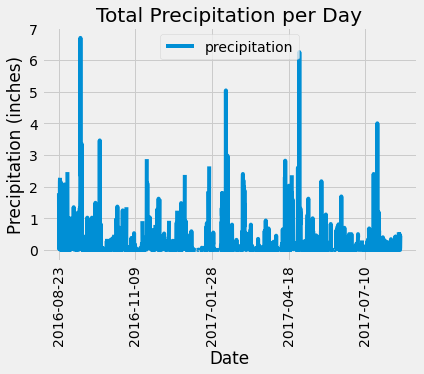

In [36]:
#Plotting the results data for a better visual effect 
results_df.plot()
plt.xticks(rotation=90)
plt.title('Total Precipitation per Day')
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
plt.show()

In [37]:
#provide statistics using describe method
#Count is determined as the number of times precipitation was observed

results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
